# To Explore Supervised Machine Learning

Task Given-  What Predicting the score if a student study for 9.25 hrs in a day ?

Approach Used - REGRESSION ALGORITHM(To predict the percentage of marks that student is expected to score based upon the no of hours they studied)

# Imported Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [36]:
path="http://bit.ly/w-data"
df=pd.read_csv(path)

# View of Dataset

In [37]:
#print(df)            #Print dataset
print(df.shape)      #Dimension of the data frame
print(df.head())     #Print first 5 rows of dataset
print(df.describe()) #Summarize the data(EDA)
print(df.dtypes)     #Data types of each columns   

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Hours     float64
Scores      int64
dtype: object


# Graphically Visualization of Dataset

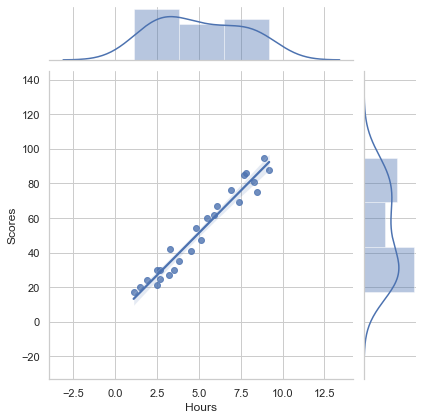

In [38]:
x=df['Hours']    # values of x-axis
y=df['Scores']   # values of y axis
sns.jointplot(x,y,kind='reg')


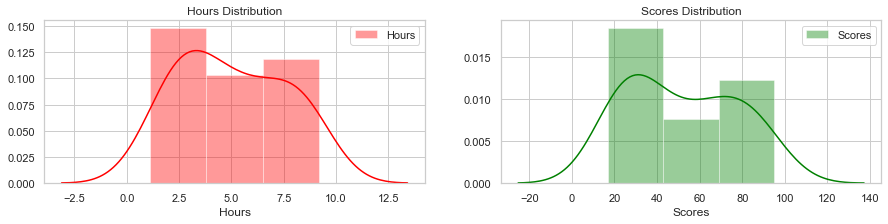

In [103]:
graph=plt.figure(figsize=(15,3))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours Distribution')
g2.set_title('Scores Distribution')
m1=sns.distplot(df['Hours'],label='Hours',ax=g1,color='red')
m2=sns.distplot(df['Scores'],label='Scores',ax=g2,color='green')
m1.legend()
m2.legend()

Find corelation between the number of hours studied and scored obtained

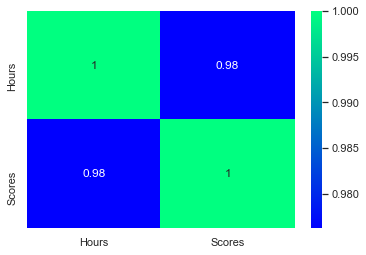

In [111]:
co_rel=df.corr()
sns.heatmap(co_rel,annot=True,cmap='winter')
plt.show()

# Splitting of data into training and testing

In [98]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [100]:
lr=LinearRegression()
rd=Ridge(alpha=30)
ls=Lasso(alpha=30)
lr.fit(X,y)
rd.fit(X,y)
ls.fit(X,y)
print(lr.coef_)
print(rd.coef_)
print(ls.coef_)

[9.77580339]
[8.17344383]
[4.87468829]


# Find the Training and Testing Score in Linear , Ridge , Lasso Regression

In [101]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
X_train_pf=pf.fit_transform(X_train)
X_test_pf=pf.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_pf,y_train)
print("-----------Linear Regression--------------")
print("Training Score:",lr.score(X_train_pf,y_train))
print("Testing Score:",lr.score(X_test_pf,y_test))


from sklearn.linear_model import Ridge
rd=Ridge(alpha=.01)
rd.fit(X_train_pf,y_train)
print("-----------Ridge Regression--------------")
print("Training Score:",rd.score(X_train_pf,y_train))
print("Testing Score:",rd.score(X_test_pf,y_test))

from sklearn.linear_model import Lasso
ls=Lasso(alpha=.01)
ls.fit(X_train_pf,y_train)
print("-----------Lasso Regression--------------")
print("Training Score:",ls.score(X_train_pf,y_train))
print("Testing Score:",ls.score(X_test_pf,y_test))

-----------Linear Regression--------------
Training Score: 0.951640582825035
Testing Score: 0.9430795712246953
-----------Ridge Regression--------------
Training Score: 0.9516403901737417
Testing Score: 0.9432134666705593
-----------Lasso Regression--------------
Training Score: 0.9516396275034215
Testing Score: 0.9433743164787214


# In all this Regression algorithms [Training and Testing score] be same . So we apply Linear Regression to further Prediction 

# Train the data using Linear Regression Algorithm

In [96]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)
from sklearn.metrics import r2_score
print("Training Score:",r2_score(y_train,pred_train))
print("Testing Score:",r2_score(y_test,pred_test))

Training Score: 0.9515510725211553
Testing Score: 0.9454906892105355


# Visualizing Differences Between Test and Train

For Training Data

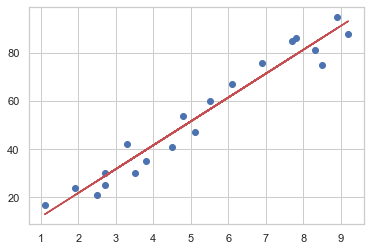

In [84]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,c='b')
plt.plot(X_train,pred_train,c='r')
plt.show()

For Testing Data

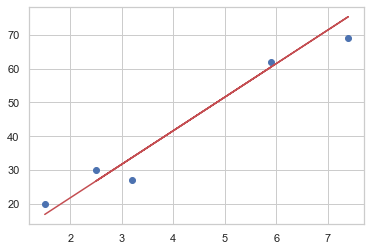

In [85]:
plt.scatter(X_test,y_test,c='b')
plt.plot(X_test,pred_test,c='r')
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_train,pred_train)
print("Mean Squared Error",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error",rmse)
mae=mean_absolute_error(y_train,pred_train)
print("Mean Absolute Error",mae)

Mean Squared Error 30.898182377314505
Root Mean Squared Error 5.558613350226341
Mean Absolute Error 5.18660170918037


In [102]:
from sklearn.metrics import r2_score
print(r2_score(y_train,pred_train))

0.9515510725211553


# Now, predict the score if a student study for 9.25 hrs in a day

In [88]:
test_sample=[9.25]
print("PREDICTED SCORE",lr.predict([test_sample]))

PREDICTED SCORE [93.69173249]
